# Quantum Teleportation

Today we explore one most beautiful quantum discover algorithm **Quantum Teleportation**

Quantum Teleportation let us transfer an **Unknown Quantum State**  from one qubit(Alice) to another(Bob) ,without physically sending the qubit.

Teleportation Requires:
- **Entaglement** - A Bell pair share between Alice and Bob.
- **Classical Computatation** - 2 Bits
- **Conditional Operarions** - Perform By Bob

In This Notebook we will:
- Understand the theory behind the teleporattaion.
- Build the teleportation circuit in qiskit.
- Visualize the intermediate state,
- Verify that the bob receives the correct final state.

# 1.Import Required Libraries

In [25]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector,DensityMatrix,partial_trace,state_fidelity
from qiskit.visualization import plot_bloch_vector,plot_histogram
from math import pi
import numpy as np

## 2. Understanding Teleportation
### Teleportation work in **three phases:**
-  **Phase 1- Prepare the Qubit**
    - Qubit 0 - contains Unknown state $ {|\psi>} $  we want to teleport.
    - Qubit 1 & 2 - from a bell pair shared between Alice and Bob.

- **Phase 2- Alice performs a Bell Measurement**
    - She Entangles her two Qubit and Measure.

- **phase 3 - Bob Applies Correction**
  Using Alice Classical Result ,Bob Applies:
    - X-Gate(Bit Flip)
    - Z-Gate(Phase Flip)

Then Bob's Qubit ends up in the original Unknown state $ {|\psi>} $.

  ---
  Now Let's Implement step-by-step!


 ## 3. Prepare a Random Qunatum State
 We Generate a random state to teleport ,so we know the outcome isn't trivial.

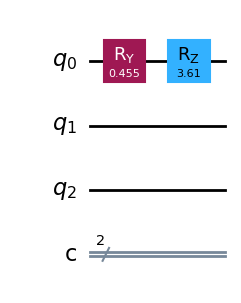

In [37]:
# Create Quantum Circuit with 3 Qubit and 2 Classical Bit
qc=QuantumCircuit(3,2)

# Generate Random angle for state phi
theta = np.random.rand() *np.pi
phi = np.random.rand() *2 *np.pi

#Prepare |phi> = Rz(phi) Ry(theta) |0>
qc.ry(theta,0)
qc.rz(phi,0)

# visualize Circuit
qc.draw('mpl')


### Bloch Sphere of Original State


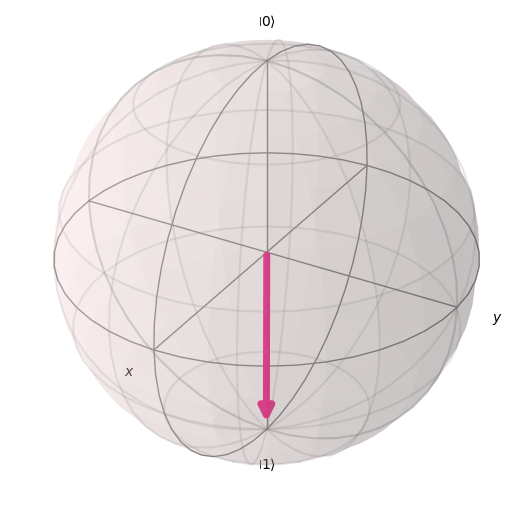

In [3]:
# Show the state as a Bloch Vector  before teleportation
initial_state= Statevector.from_instruction(qc)
vec=initial_state.data

# calculate bloch vector Co-ordinates
bloch_x= 2 * np.real(np.conj(vec[0]) * vec[1])
bloch_y= 2 * np.imag(np.conj(vec[0]) * vec[1])
bloch_z = np.abs(vec[0])**2 - np.abs(vec[1])**2
plot_bloch_vector([bloch_x,bloch_y,bloch_z])

## 4.Create Bell Pair (Entanglement)
we now entangle the Qubit 1 & 2.

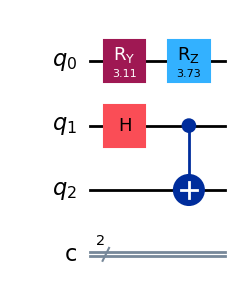

In [4]:
# Create |psi ^+> =(|00>+|11>)/sqrt(2)
qc.h(1)
qc.cx(1,2)
qc.draw('mpl')

## 5. Alice Perform Bell Measurement
Alice Entangles qubit 0 and 1, then measure them.


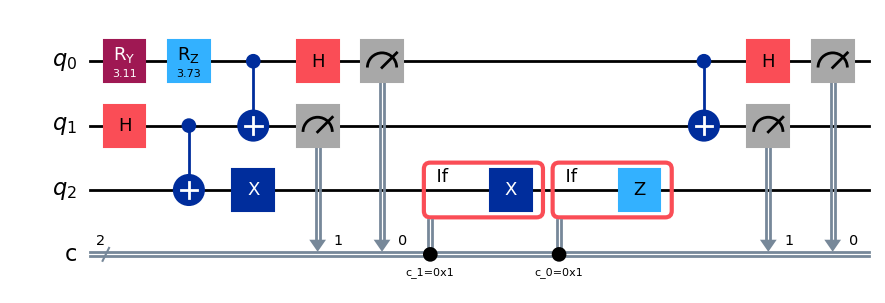

In [31]:
# entangles Qubit 0 (state |phi> with Alice's entangled qubit(1))
qc.cx(0,1)
qc.h(0)

#Measure Alice's Qubits
qc.measure([0,1],[0,1])
qc.draw('mpl')

## 6.Bob Applies conditional correction
Bob receives Alice's classical bits and applies corrections:
- if Bit1==1 apply X-Gate
- if Bit0==1 apply Z-Gate

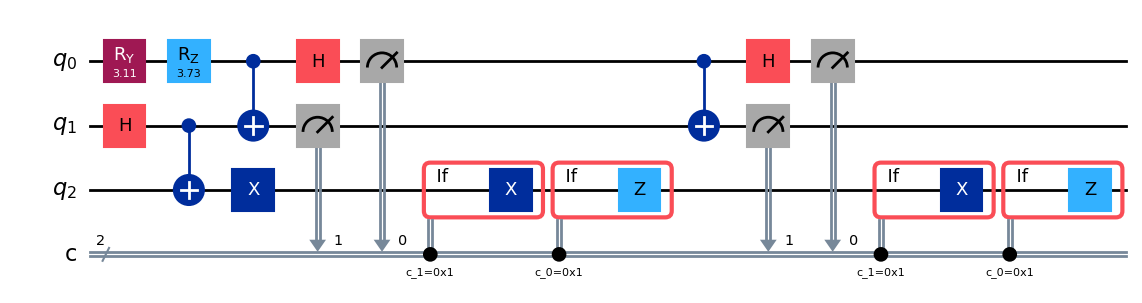

In [32]:
# conditional Operation
with qc.if_test((1,1)):
    qc.x(2)
with qc.if_test((0,1)):
    qc.z(2)
qc.draw('mpl')

## 7. Run the Simulation

In [33]:
from qiskit import transpile
sim=AerSimulator(method="statevector")
qc_save=qc.copy()
qc_save.save_statevector()
compiled =transpile(qc_save,sim)
result=sim.run(compiled).result()
final_state = result.get_statevector()
final_state

Statevector([-0.        +0.j        , -0.        +0.j        ,
              0.00482346+0.01600814j,  0.        -0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.28846095-0.95734568j, -0.        +0.j        ],
            dims=(2, 2, 2))


## 8.Extract Bob's final Qubit State

In [34]:
rho = DensityMatrix(final_state)
bob_state=partial_trace(rho,[0,1])
bob_state

DensityMatrix([[ 2.79526186e-04+1.94001498e-22j,
                -1.39339381e-02+9.23544376e-03j],
               [-1.39339381e-02-9.23544376e-03j,
                 9.99720474e-01-2.19838669e-17j]],
              dims=(2,))


## 9.Compare Initial and Final State
we compute fidelity to ensure teleporation successed

In [35]:
qc_orig=QuantumCircuit(1)
qc_orig.ry(theta,0)
qc_orig.rz(phi,0)
original_state=Statevector.from_instruction(qc_orig)
original_dm=DensityMatrix(original_state)
bob_dm=DensityMatrix(bob_state)
fidelity=state_fidelity(original_dm,bob_dm)
fidelity

1.0000000000000009

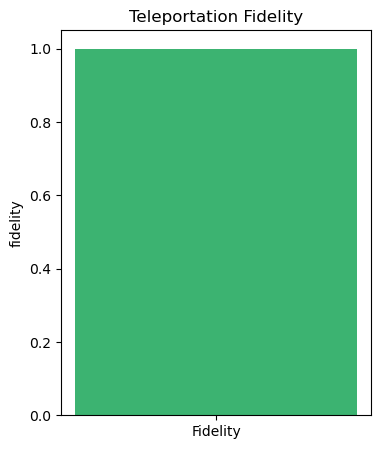

In [36]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(4,5))
plt.bar(['Fidelity'],[fidelity],color='mediumseagreen')
plt.ylim(0,1.05)
plt.ylabel("fidelity")
plt.title("Teleportation Fidelity")
plt.show()

## Final Result
- Bob's qubit now contains the state **|psi>** that alice originally prepared
- this happen **without sending the qubit physically**,only 2 classical bits.
- fidelity should be **1.0**,meaning perfect teleporatation.

In this notebook we learn working of Quantum Teleporatation in quantum computing.this used in quantum communication,quantum network,entanglement swapping.most imporatantly add noise channel to simmulate **realistic quantum channels**

---

**Author:** *Shreya Palase*  

**Date Created:**  *3-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day10_QuantumTeleportation.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>